In [1]:
from tesspy.tessellation import Tessellation
from tesspy.poi_data import RoadData, POIdata
import matplotlib.pyplot as plt
import contextily as ctx



import warnings
warnings.filterwarnings('ignore')

In [2]:
city = Tessellation('Nairobi')

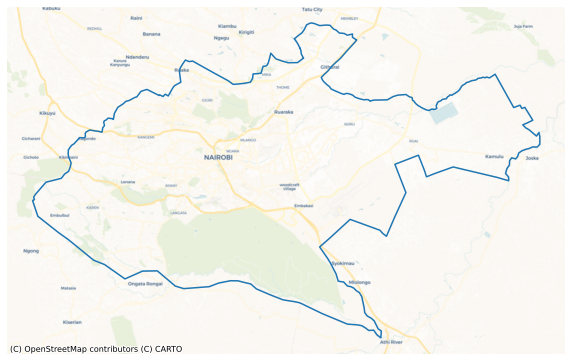

In [3]:
city_polygon = city.get_polygon()

ax = city_polygon.boundary.plot(figsize=(10,10))
ctx.add_basemap(ax=ax, crs=city_polygon.crs, source=ctx.providers.CartoDB.Voyager)
ax.set_axis_off()

# Data Collection

In [4]:
city_POI = POIdata(city_polygon, ["amenity", "building"], 60, False).get_poi_data()

# only collecting buildung data
city_building = POIdata(city_polygon, ["building"], 60, False).get_poi_data()

city_road = RoadData(city_polygon, 
                     detail_deg=None, 
                     split_roads=True,
                     verbose=True).get_road_network()

Creating custom filter for all highway types
Created custom filter is ['highway'~'motorway|trunk|primary|secondary|tertiary|residential|unclassified|motorway_link|trunk_link|primary_link|secondary_link|living_street|pedestrian|track|bus_guideway|footway|path|service|cycleway']
Collection street network data
Splitting the linestring, such that each linestring has exactly 2 points.
Collected data has 338948 street segments


# Tessellations

## Squares and Hexagons

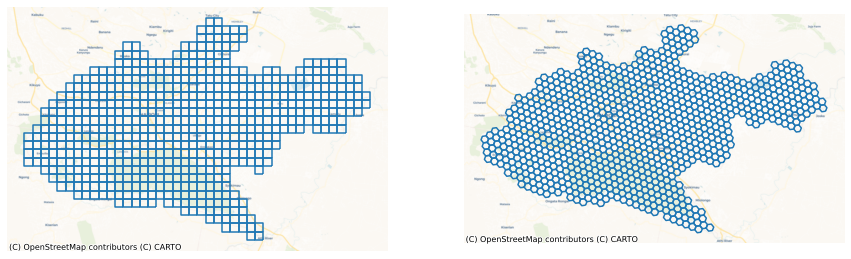

In [5]:
#user input is the resolution
city_sq = city.squares(15)

city_hex = city.hexagons(8)

fig,axes = plt.subplots(1,2, figsize=(15,10))

city_sq.boundary.plot(ax=axes[0])
ctx.add_basemap(ax=axes[0], crs=city_polygon.crs, source=ctx.providers.CartoDB.Voyager)
axes[0].set_axis_off()

city_hex.boundary.plot(ax=axes[1])
ctx.add_basemap(ax=axes[1], crs=city_polygon.crs, source=ctx.providers.CartoDB.Voyager)
axes[1].set_axis_off()

## Adaptive Squares

In [6]:
# Adaptive Squares using only building data
city_asq = city.adaptive_squares(start_resolution=13, 
                                 poi_categories=["building"], 
                                 threshold=None, 
                                 timeout=60, 
                                 verbose=False)

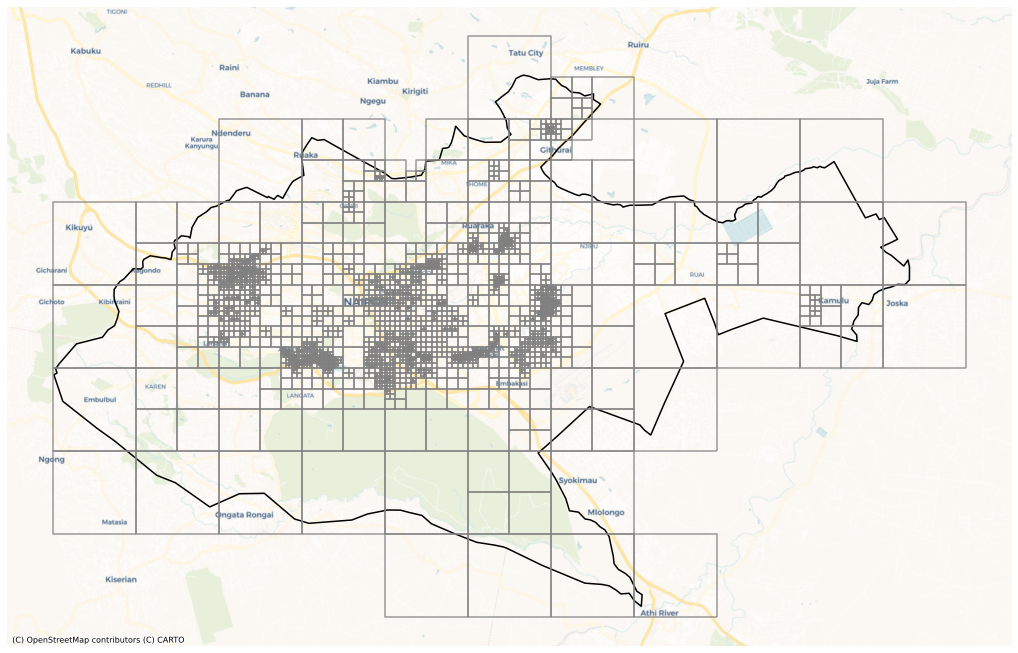

In [12]:
ax = city_polygon.boundary.plot(color='black', figsize=(18,15))
city_asq.boundary.plot(ax=ax, color="grey", alpha=0.8)
ctx.add_basemap(ax=ax, crs=city_polygon.crs, source=ctx.providers.CartoDB.Voyager)
ax.set_axis_off()

In [8]:
# Adaptive Squares using only building data
city_asq_2 = city.adaptive_squares(start_resolution=13, 
                                 poi_categories=["amenity","building"], 
                                 threshold=400, 
                                 timeout=60, 
                                 verbose=False)

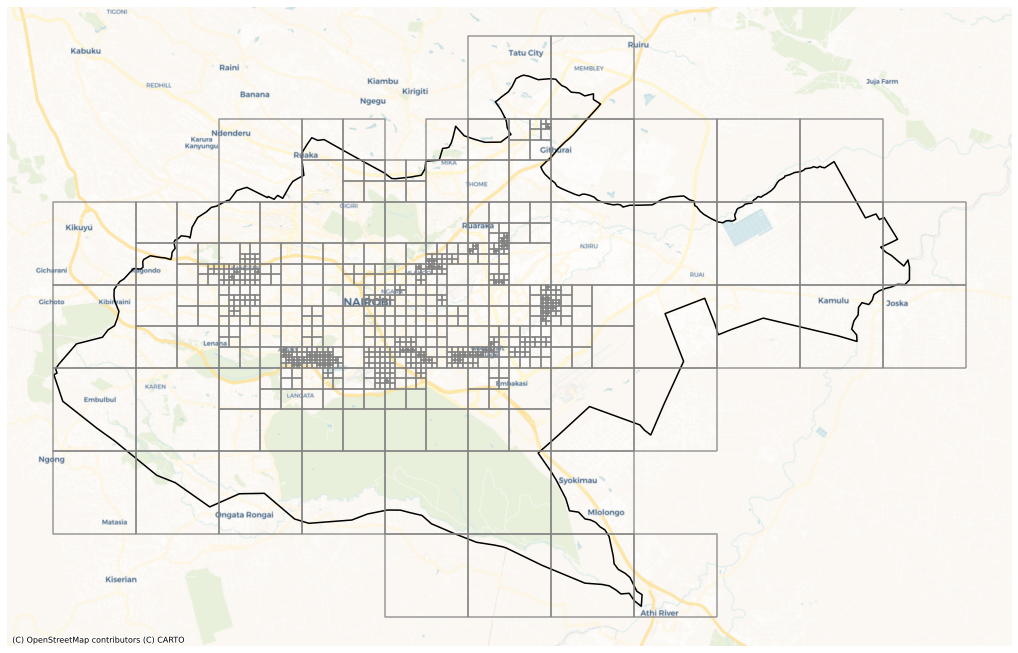

In [13]:
ax = city_polygon.boundary.plot(color='black', figsize=(18,15))
city_asq_2.boundary.plot(ax=ax, color="grey", alpha=0.8)
ctx.add_basemap(ax=ax, crs=city_polygon.crs, source=ctx.providers.CartoDB.Voyager)
ax.set_axis_off()

## Voronoi Polygons

In [18]:
city_kmeans = city.voronoi(cluster_algo="k-means",
                          poi_categories=["amenity"],
                          timeout=60,
                          n_polygons=500,
                          verbose=False)

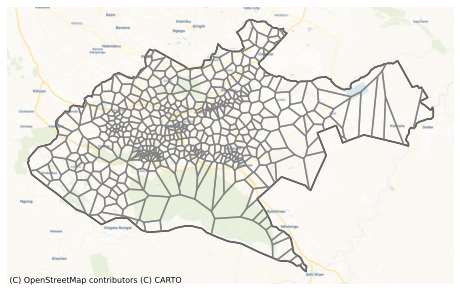

In [19]:
ax = city_polygon.boundary.plot(color='black', figsize=(8,10))
city_kmeans.boundary.plot(ax=ax, color="grey", alpha=0.8)
ctx.add_basemap(ax=ax, crs=city_polygon.crs, source=ctx.providers.CartoDB.Voyager)
ax.set_axis_off()

In [16]:
city_hdbscan = city.voronoi(cluster_algo="hdbscan",
                          poi_categories=["amenity"],
                          timeout=60,
                          min_cluster_size=15,
                          verbose=False)

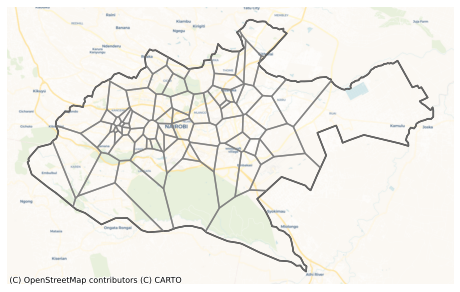

In [20]:
ax = city_polygon.boundary.plot(color='black', figsize=(8,10))
city_hdbscan.boundary.plot(ax=ax, color="grey", alpha=0.8)
ctx.add_basemap(ax=ax, crs=city_polygon.crs, source=ctx.providers.CartoDB.Voyager)
ax.set_axis_off()

## City Blocks

In [21]:
city_cb = city.city_blocks(number_of_LGUs=2000,
                          detail_deg=None,
                          split_roads=True,
                          verbose=True)

Creating custom filter for all highway types
Created custom filter is ['highway'~'motorway|trunk|primary|secondary|tertiary|residential|unclassified|motorway_link|trunk_link|primary_link|secondary_link|living_street|pedestrian|track|bus_guideway|footway|path|service|cycleway']
Collection street network data
Splitting the linestring, such that each linestring has exactly 2 points.
Collected data has 338948 street segments
Road data is collected. Overall 338948 streets are included.
Creating initial city blocks using the road network data
Filtered out 3430 polygons, that where not in the area.
Threshold for hierarchical clustering is computed.
Distance threshold for clustering is 1000.
Hierarchical Clustering in Progress with threshold 1000.
Merging small city blocks...


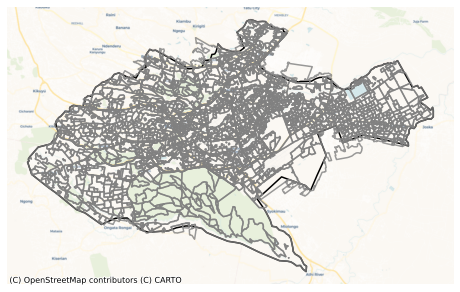

In [23]:
ax = city_polygon.boundary.plot(color='black', figsize=(8,10))
city_cb.boundary.plot(ax=ax, color="grey", alpha=0.8)
ctx.add_basemap(ax=ax, crs=city_polygon.crs, source=ctx.providers.CartoDB.Voyager)
ax.set_axis_off()